---
# K Nearest Neighbors

---

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970’s as a non-parametric technique.

Knn uses follwoing as a distance function :

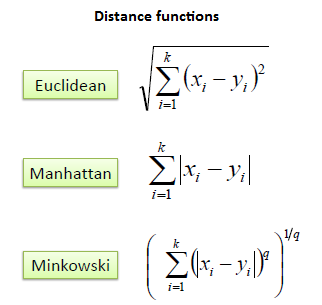

- 1)Euclidean distance is calculated as the square root of the sum of the squared differences between a new point (x) and an existing point (xi) across all input attributes j.

    EuclideanDistance(x, xi) = sqrt( sum( (xj – xij)^2 ) )
    

- 2)Manhattan Distance: Calculate the distance between real vectors using the sum of their absolute difference. Also called City Block Distance.

- 3)Minkowski Distance: Generalization of Euclidean and Manhattan distance.



**Different disciplines in KNN**

1) Instance-Based Learning: The raw training instances are used to make predictions. As such KNN is often referred to as instance-based learning or a case-based learning (where each training instance is a case from the problem domain).

2) Lazy Learning: No learning of the model is required and all of the work happens at the time a prediction is requested. As such, KNN is often referred to as a lazy learning algorithm.

3) Non-Parametric: KNN makes no assumptions about the functional form of the problem being solved. As such KNN is referred to as a non-parametric machine learning algorithm.

## Task

In this project, I will build a KNN model from scratch and also use the knn model imported form scikit-learn. Then compare the result or these models.


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

## Data Introduction and preparation

The data has 6 features and target, and contains 1728 rows and 7 columns with descriptions as follows:  
* buying: Buying Level or Capacity of the customer (Very High:vhigh, High:high, Low:low, Medium:med)
* maint: Maintainence Level (Very High:vhigh, High:high, Low:low, Medium:med)
* doors: Number of doors in the car (2, 3, 4 and 5 or more)
* persons: capacity in terms of persons to carry (2,4, and more)
* lug_boot: Luggage Boot Size in the car (small, med, big)
* safety: Safety Level of Car (high, med, low)
* class: Unacceptable, Acceptable, VeryGood, Good

Target has 4 values (unacc, acc, good, v-good)


In [6]:
data = pd.read_csv ('car.data')

In [7]:
data.head ()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [8]:
# After read the data, I found there is no column names in the data.
# Add column names 
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv ('car.data', names=columns)

In [9]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
# Check if has null value 
data.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [12]:
# Cheking for duplicated rows
duplicates = data[data.duplicated()]
print(len(duplicates))

0


In [13]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,4,more,med,med,unacc
freq,432,432,432,576,576,576,1210


### Features vs Target Analysis

<AxesSubplot:title={'center':'buying price vs class'}, xlabel='buying', ylabel='count'>

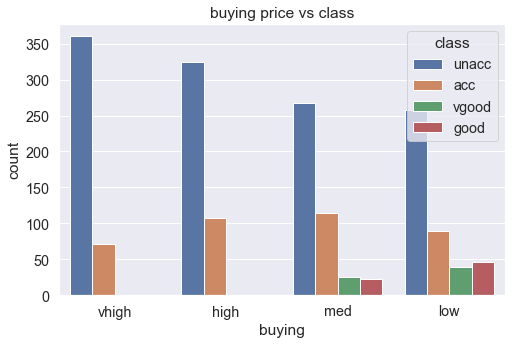

In [14]:
# First I checked the relationship between buying price and class
plt.figure (figsize = (8,5))
plt.title ("buying price vs class")
sns.countplot(x ='buying', hue = 'class', data = data)

From the buying price vs class plot, it shows there almost no very good or very good class in the high and very high buying price range. Most good and very good condition cars with med or low buying price. 

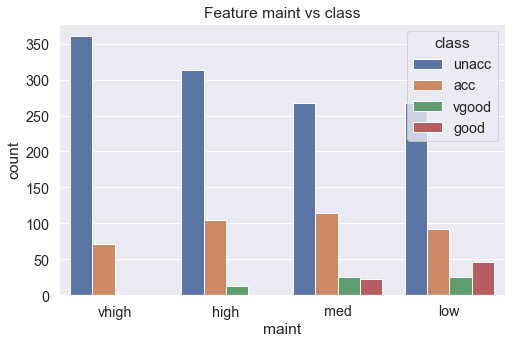

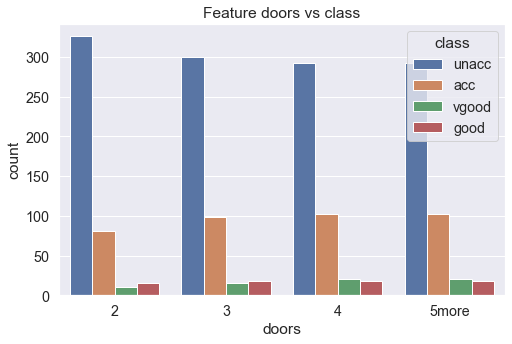

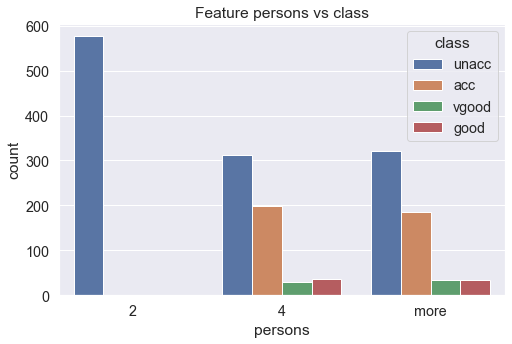

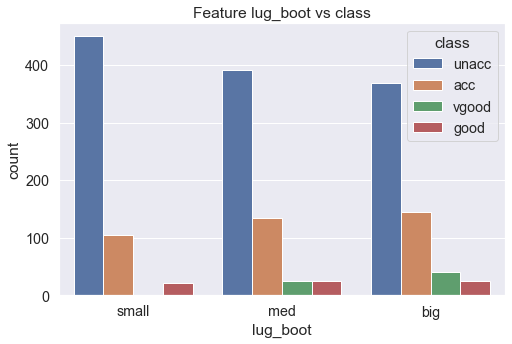

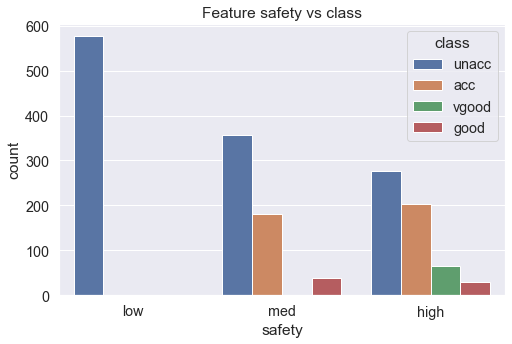

In [15]:
# Similarly, I analyzed the relationship between  other features  and targets. 
for i in data.columns [1:-1]:
    plt.figure (figsize = (8,5))
    plt.title ("Feature %s vs class"%i)
    sns.countplot(x =data[i], hue = 'class', data = data)


### Label Encoding

For machine learning, categories with strings need to be converted to integers.

In [16]:
data['class'].replace (('unacc','acc','good','vgood'),(0,1,2,3), inplace=True)

In [17]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0


In [18]:
# Similarly,replace from string to integer for other features
data['buying'].replace (('low','med','high','vhigh'),(0,1,2,3), inplace=True)
data['maint'].replace (('low','med','high','vhigh'),(0,1,2,3), inplace=True)
data['lug_boot'].replace (('small','med','big'),(0,1,2), inplace=True)
data['safety'].replace (('low','med','high'),(0,1,2), inplace=True)
data['doors'].replace ('5more',5, inplace=True)
data['persons'].replace ('more',5, inplace=True)

In [19]:
# I found datetype of doors and persons is object and need to be changed to int64
data['doors']= data['doors'].astype(str).astype(int) 
data['persons']= data['persons'].astype(str).astype(int) 

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int32
 3   persons   1728 non-null   int32
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   class     1728 non-null   int64
dtypes: int32(2), int64(5)
memory usage: 81.1 KB


In [21]:
data

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,5,5,1,1,2
1724,0,0,5,5,1,2,3
1725,0,0,5,5,2,0,0
1726,0,0,5,5,2,1,2


In [22]:
data.corr()

,buying,maint,doors,persons,lug_boot,safety,class
buying,1.000000e+00,-1.356939e-15,4.191709e-15,7.886258e-16,-1.045866e-16,-4.082114e-16,-0.282750
maint,-1.356939e-15,1.000000e+00,7.812681e-16,1.822741e-16,8.544286e-17,-7.826398e-17,-0.232422
doors,4.191709e-15,7.812681e-16,1.000000e+00,-9.989138e-17,-1.632846e-17,2.801175e-17,0.066057
persons,7.886258e-16,1.822741e-16,-9.989138e-17,1.000000e+00,-1.438481e-17,7.570954e-18,0.373459
lug_boot,-1.045866e-16,8.544286e-17,-1.632846e-17,-1.438481e-17,1.000000e+00,1.927471e-18,0.157932
safety,-4.082114e-16,-7.826398e-17,2.801175e-17,7.570954e-18,1.927471e-18,1.000000e+00,0.439337
class,-2.827504e-01,-2.324215e-01,6.605665e-02,3.734592e-01,1.579317e-01,4.393373e-01,1.000000


<AxesSubplot:title={'center':'heatmap'}>

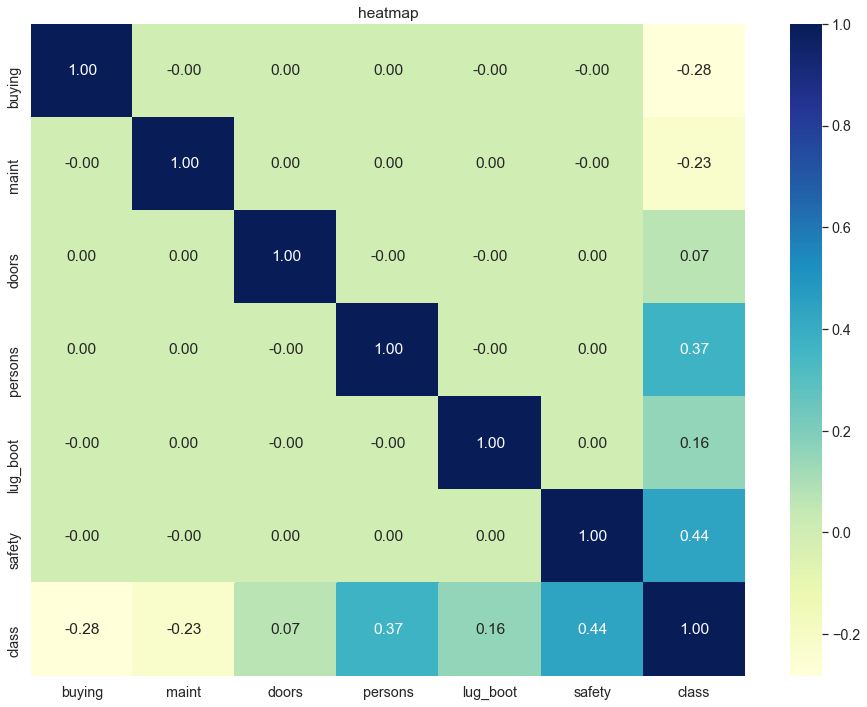

In [23]:
plt.figure (figsize = (16,12))
plt.title ("heatmap")
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu",fmt='.2f')

Class is negatively correlated with buying price and maint fee; and postively correlated with persons and safety.

### Training Data

In [77]:
X= data.iloc[:,:6]
y= data.iloc[:,6:]

In [25]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,0,0
1,3,3,2,2,0,1
2,3,3,2,2,0,2
3,3,3,2,2,1,0
4,3,3,2,2,1,1


In [26]:
X.shape, y.shape

((1728, 6), (1728, 1))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state =1)

In [28]:
y_test.shape

(519, 1)

## Use Scikit-learn KNeighbors model

In [29]:
# Create a KNN model
knn = KNeighborsClassifier(n_neighbors =5)

In [30]:
# Feeding the model
knn.fit (X_train, y_train)

C:\Users\wangj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [31]:
# Predict the value for X_test
y_pred = knn.predict (X_test)

In [32]:
# Print Accuracy
print ("Training Accuracy:", knn.score(X_train, y_train))
print ("Testing  Accuracy:", knn.score(X_test, y_test))

Training Accuracy: 0.9793217535153019
Testing  Accuracy: 0.9518304431599229


### Predict Evaluation 

In [33]:
confusion_matrix = confusion_matrix (y_test, y_pred)
print (confusion_matrix)

[[362   6   0   0]
 [  8 103   0   0]
 [  1   5  16   0]
 [  0   3   2  13]]


In [34]:
print (classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       368
           1       0.88      0.93      0.90       111
           2       0.89      0.73      0.80        22
           3       1.00      0.72      0.84        18

    accuracy                           0.95       519
   macro avg       0.94      0.84      0.88       519
weighted avg       0.95      0.95      0.95       519



### Use different K value to predict, and then to choose the best K value. 

In [35]:
# put all accurancy values into a list 
score_k =[]
for k in range (3, 15):
    knn_k =KNeighborsClassifier (n_jobs=-1, n_neighbors =k)
    knn_k.fit (X_train, y_train)
    y_pred_k = knn_k.predict (X_test)
    score = knn_k.score(X_test, y_test)
    score_k.append (score.mean ())

C:\Users\wangj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\wangj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\wangj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\wangj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

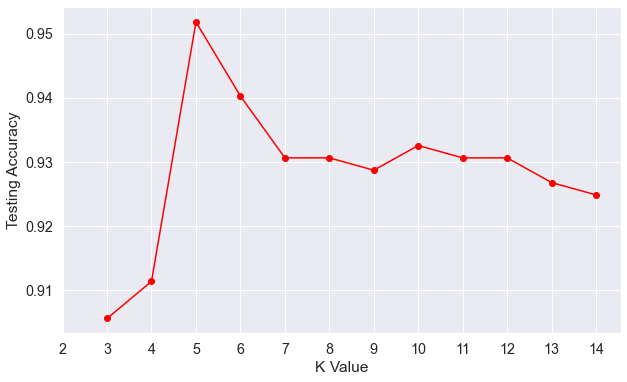

In [36]:
#Ploting predict accuracy with different K value 
plt.figure(figsize=(10,6))
plt.plot(range(3,15), score_k,marker='o',color = 'red')
plt.xlabel ('K Value')
plt.ylabel ('Testing Accuracy')
plt.xticks (range (2,15,1))
plt.show()

It shows that when K = 5, the model has the highest accuracy. 

## Build K Nearest Neighbors method from scratch

There are several different methods to calculate the distance between two point, such as Euclidean, Manhattan, Hamming, etc.  
I selected to use Euclidian method.


### Euclidean Distance

In mathematics, the Euclidean distance between two points in Euclidean space is the length of a line segment between the two points. It can be calculated from the Cartesian coordinates of the points using the Pythagorean theorem, therefore occasionally being called the Pythagorean distance. 

The distance between any two points on the real line is the absolute value of the numerical difference of their coordinates. Thus if ${\displaystyle p}$ and ${\displaystyle q} $are two points on the real line, then the distance between them is given by:

${\displaystyle d(p,q)=|p-q|.}$

A more complicated formula, giving the same value, but generalizing more readily to higher dimensions, is:  
${\displaystyle d(p,q)={\sqrt {(p-q)^{2}}}.}$

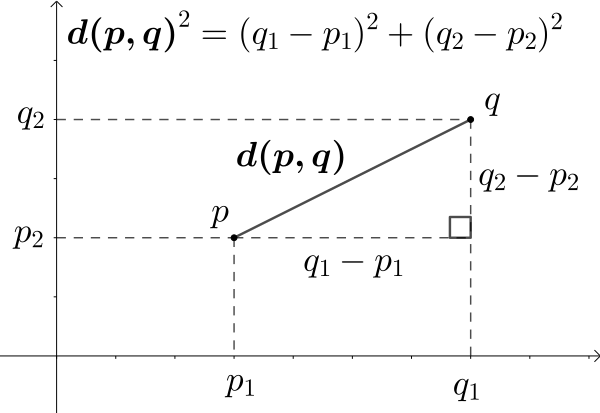

In [37]:
#Importing the required modules
from scipy.stats import mode

In [38]:
 #Euclidean Distance
def euc_distance(p,q):
    distance = np.sqrt(np.sum((p-q)**2))
    return distance

In [39]:
X_train_np = X_train.to_numpy()
y_train_np= y_train.to_numpy()
X_test_np= X_test.to_numpy()
y_test_np= y_test.to_numpy()

In [40]:
X_test_np.shape

(519, 6)

In [41]:
y_test_np.shape

(519, 1)

In [42]:
# check if euc_distance works or not
X_train_np[1],y_train_np[2]

(array([2, 0, 5, 4, 1, 2], dtype=int64), array([0], dtype=int64))

In [43]:
euc_distance(X_train_np[1],y_train_np[2])

7.0710678118654755

In [44]:
#Founction find neighbors
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    neighbors = []
    for i, p in enumerate(training_features):
        d = euc_distance(point, p)
        temp_data = [p, training_labels[i], d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [45]:
#Test if find neighbors works or not
print (X_test_np[0])

[1 0 3 5 0 0]


In [46]:
k_nearest_neighbors (X_test_np[0],X_train_np,y_train_np,3)

[[array([1, 0, 4, 5, 0, 0], dtype=int64), array([0], dtype=int64), 1.0],
 [array([1, 0, 3, 4, 0, 0], dtype=int64), array([0], dtype=int64), 1.0],
 [array([1, 0, 3, 5, 0, 1], dtype=int64), array([1], dtype=int64), 1.0]]

In [55]:
# Function KNN method
def KNN_predict (point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else: 
        return sum(x[1] for x in neighbors)/k

In [56]:
X_test_np.shape

(519, 6)

In [57]:

y_pred_np = KNN_predict(X_test_np[1], X_train_np, y_train_np, 5)

In [58]:
print (X_test_np[1], y_test_np[1],y_pred_np)

[2 2 3 5 2 1] [1] [1]


In [61]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for i, point in enumerate(test_features):
        error += test_labels[i] != KNN_predict(point, 
                                               training_features, 
                                               training_labels, 
                                               k)
    return error/k

In [62]:
error = classification_error(X_test_np, y_test_np, X_train_np, y_train_np, 3)

In [63]:
error

array([12.])

In [66]:
predicted_labels = np.array ([KNN_predict(point, 
                                X_train_np, 
                                y_train_np, 
                                5) for point in X_test_np])

### Predict Evaluation 

In [73]:
from sklearn.metrics import classification_report,confusion_matrix


In [76]:
confusion_matrix_2 = confusion_matrix (y_test_np,predicted_labels)
print (confusion_matrix_2)

[[364   4   0   0]
 [ 10 101   0   0]
 [  0   7  15   0]
 [  0   4   0  14]]


In [75]:
print(classification_report(y_test_np,predicted_labels))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       368
           1       0.87      0.91      0.89       111
           2       1.00      0.68      0.81        22
           3       1.00      0.78      0.88        18

    accuracy                           0.95       519
   macro avg       0.96      0.84      0.89       519
weighted avg       0.95      0.95      0.95       519



## Conclusion 

Comparing the test results of model from scikt-learn and my own model built from scratch, I found that both these two predict accuracy score are 0.95; macro avg socre of sciket-learn model predict result is 0.88, while the macro avg score  of my own model predict result is 0.89. These information indicates that my own model built from scratch is good enough to use for predicting.